<a href="https://colab.research.google.com/github/parkmonty/W_Pile/blob/main/lecture_review_week4_(boost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas 1**

* 구조화된 데이터의 처리를 지원하는 Python 라이브러리 Python 계의 엑셀
* 고성능 Array 계산 라이브러리인 Numpy와 통합하여, 강력한 "스프레드시트" 처리 기능을 제공
* 인덱싱, 연산용 함수, 전처리 함수 등을 제공함

> Series

* DataFrame 중 하나의 Column에 해당하는 데이터의 모음 Object
* Index, Data, Data type이 출력

> DataFrame

* Data Table 전체를 포함하는 Object

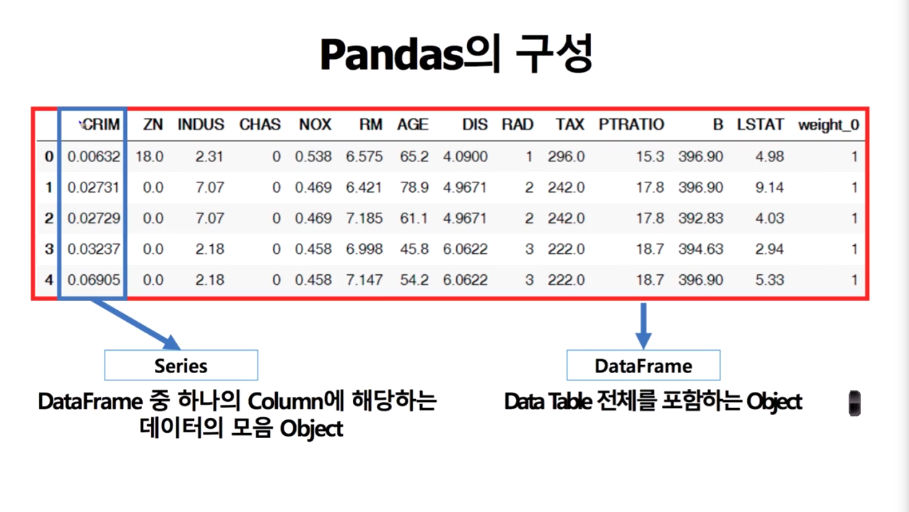

## Series

> Series(data = ?, index = ?, dtype = ?, name = ?)

* index 이름을 지정 가능
* data type 설정 가능
* series 이름 설정 가능
* 일반적으로 데이터 접근 시에는 index를 이용함

## DataFrame

* index, column의 값으로 데이터를 찾음
* 일반적으로 2차원 matrix라고 가정함

> DataFrame(columns = ['column 이름 1', 'column 이름 2'])

* 특정 column만 선택해서 데이터를 가져올 수 있음

> columns = ['column 이름 1', 'column 이름 2', '새로운 column']

* 새로운 column 추가시에 None 값으로 추가

> df.column 이름 / df['column 이름']

* 두 가지 방법으로 Series 추출이 가능

> df.loc[  ]

* index location
* index의 이름을 기준으로 값을 가져옴

> df.iloc[  ]

* index position
* index의 번호로 값을 가져옴

> column에 새로운 데이터 할당

* df.debt = df.age > 40

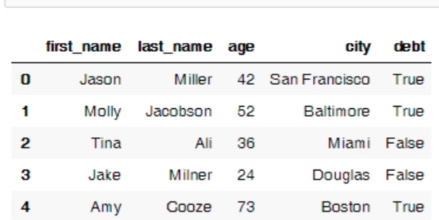

> transpose

* df.T

> 값 출력

* df.values

> csv 변환

* df.to_csv()

> column 삭제

* del df["debt"]

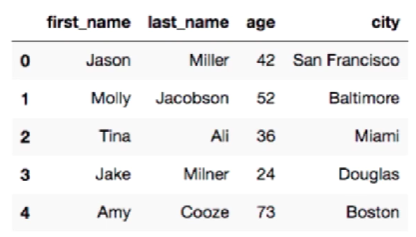

## Selection & Drop

> Selection with column names

* df["column1"].head(3)
* 한개의 column 선택
* df["column1", "column2", "column3"].head(3)
* 1개 이상의 column 선택

> Selection with index number

* df[:3]
* column 이름 없이 사용하는 index number는 row 기준 표시 **(좋지 않은 방법)**
* df["column1"][:3]
* column 이름과 함께 row index 사용시, 해당 column만

> Series selection

* account_series[:3]
* account_series[[1, 2, 3]]
* 1개 이상의 index
* account_series[account_series < 250000]
* boolean index

> Index 변경

* df.index = df['account']
* del df["account"]
* index 값에 해당 column 값을 넣고 해당 column 값은 그대로 남아 있기 때문에 삭제

> Basic, loc, iloc selection

* **df[['name', 'street']][:2]**
* column과 index number
* df.loc[[211829, 320563],['name', 'street']]
* column과 index name
* **df.iloc[:2, :2]**
* column number와 index number

> Index 재설정

* df.index = list(range(0, 15))

> Data drop

* df.drop(1)
* index number로 drop
* df.drop([0, 1, 2, 3])
* 한개 이상의 index number로 drop
* df.drop("city", axis = 1)
* axis 지정으로 축을 기준으로 drop -> column 중에 "city"

## Dataframe Operations

> Series operation

* s1 = Series(range(1,6), index = list("abced"))
* s2 =  Series(range(5,11), index = list("bcedef"))
* index 기준으로 연산수행
* 겹치는 index가 없을 경우 NaN값으로 반환

> Dataframe operation

* df1 = DataFrame(np.arange(9).reshape(3, 3), columns = list("abc"))
* df2 = DataFrame(np.arange(16).reshape(4, 4), columns = list("abcd"))
* df는 column과 index를 모두 고려
* add operation을 쓰면 NaN값 0으로 변환
* Operation types : add, sub, div, mul

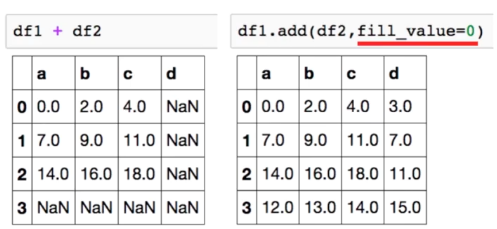

> Series + Dataframe

* df = DataFrame(np.arange(16).reshape(4, 4), columns = list("abcd"))
* s = Series(np.arange(10, 14), index = list("abced"))
* column을 기준으로 broadcasting이 발생함

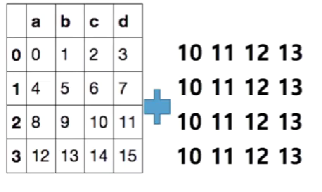

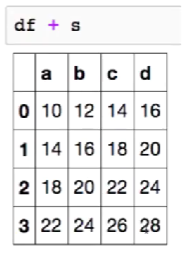

## lambda, map, apply

In [1]:
import pandas as pd
import numpy as np

> map for series

* Pandas의 series type의 데이터에도 map 함수 사용가능
* function 대신 dict, sequence형 자료등으로 대체 가능

In [3]:
s1 = pd.Series(np.arange(10))
s1.head(5)

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [4]:
s1.map(lambda x : x ** 2).head(5)

0     0
1     1
2     4
3     9
4    16
dtype: int64

In [6]:
# dict type으로 데이터 교체
# 없는 값은 NaN
z = {1: 'A', 2: 'B', 3: 'C'}
s1.map(z).head(5)

0    NaN
1      A
2      B
3      C
4    NaN
dtype: object

In [8]:
# 같은 위치의 데이터를 s2로 전환
s2 = pd.Series(np.arange(10, 20))
s1.map(s2).head(5)

0    10
1    11
2    12
3    13
4    14
dtype: int64

> apply for dataframe

* map과 달리, series 전체(column)에 해당 함수를 적용
* 입력값이 series 데이터로 입력받아 handling 가능
* 각 column 별로 결과값 반환

> applymap for dataframe

* series 단위가 아닌 element 단위로 함수를 적용함
* series 단위에 apply를 적용시킬 때와 같은 효과
* 전체 element를 바꿔줄때 사용

## Pandas Built-in dunction

> describe

* Numeric type 데이터의 요약 정보를 보여줌

> unique

* series data의 유일한 값을 list로 반환함